## matplotlib ile veri görselleştirme
- Matplotlib; veri görselleştirmesinde kullandığımız temel python kütüphanesidir. 2 ve 3 boyutlu çizimler yapmamızı sağlar. Matplotlib genelde 2 boyutlu çizimlerde kullanılırken, 3 boyutlu çizimlerde başka kütüphanelerden yararlanılır.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Fish.csv")
df=data.copy()

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [83]:
species = df['Species'].value_counts()
species

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

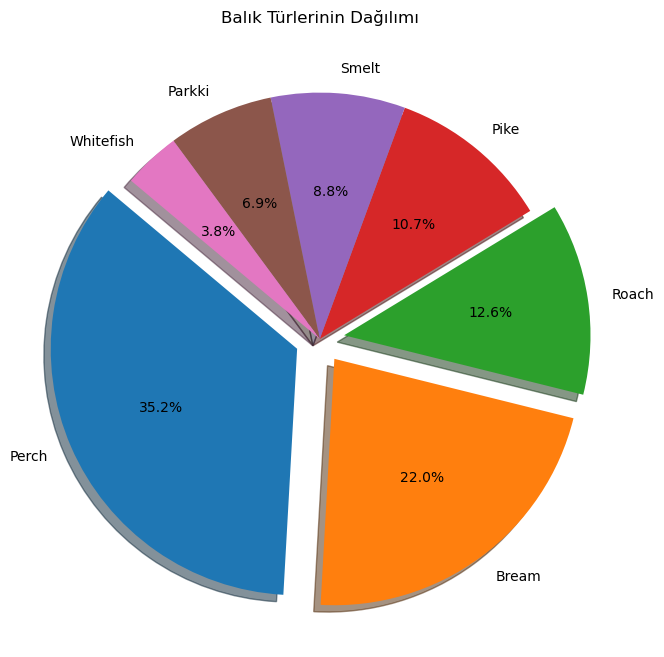

In [85]:
species = df['Species'].value_counts()
# Pasta grafiği çizme
plt.figure(figsize=(8, 8))
plt.pie(species.values, labels=species.index, autopct='%1.1f%%', startangle=140,explode=[0.1,0.1,0.1,0,0,0,0], shadow=True)
plt.title('Balık Türlerinin Dağılımı')
plt.show()

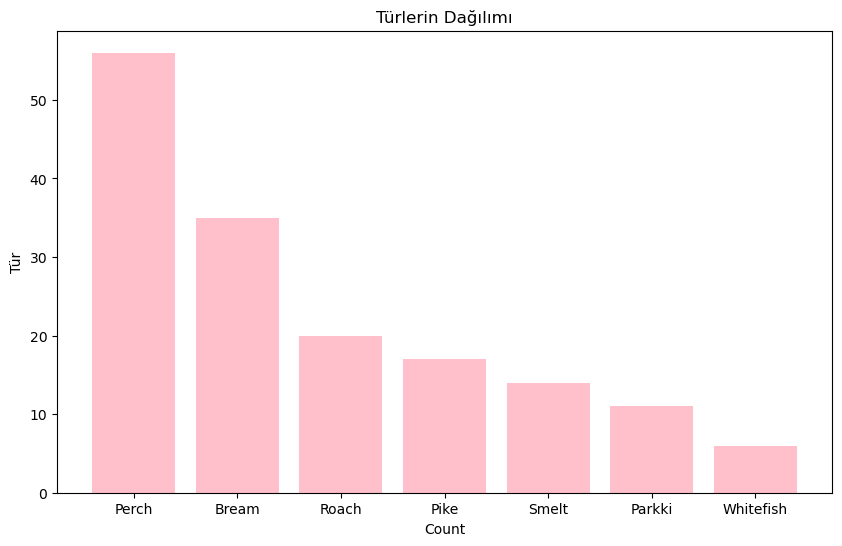

In [100]:
plt.figure(figsize=(10, 6))
plt.bar(species.index, species.values,color="pink")
plt.xlabel('Count')
plt.ylabel('Tür')
plt.title('Türlerin Dağılımı')
plt.show()

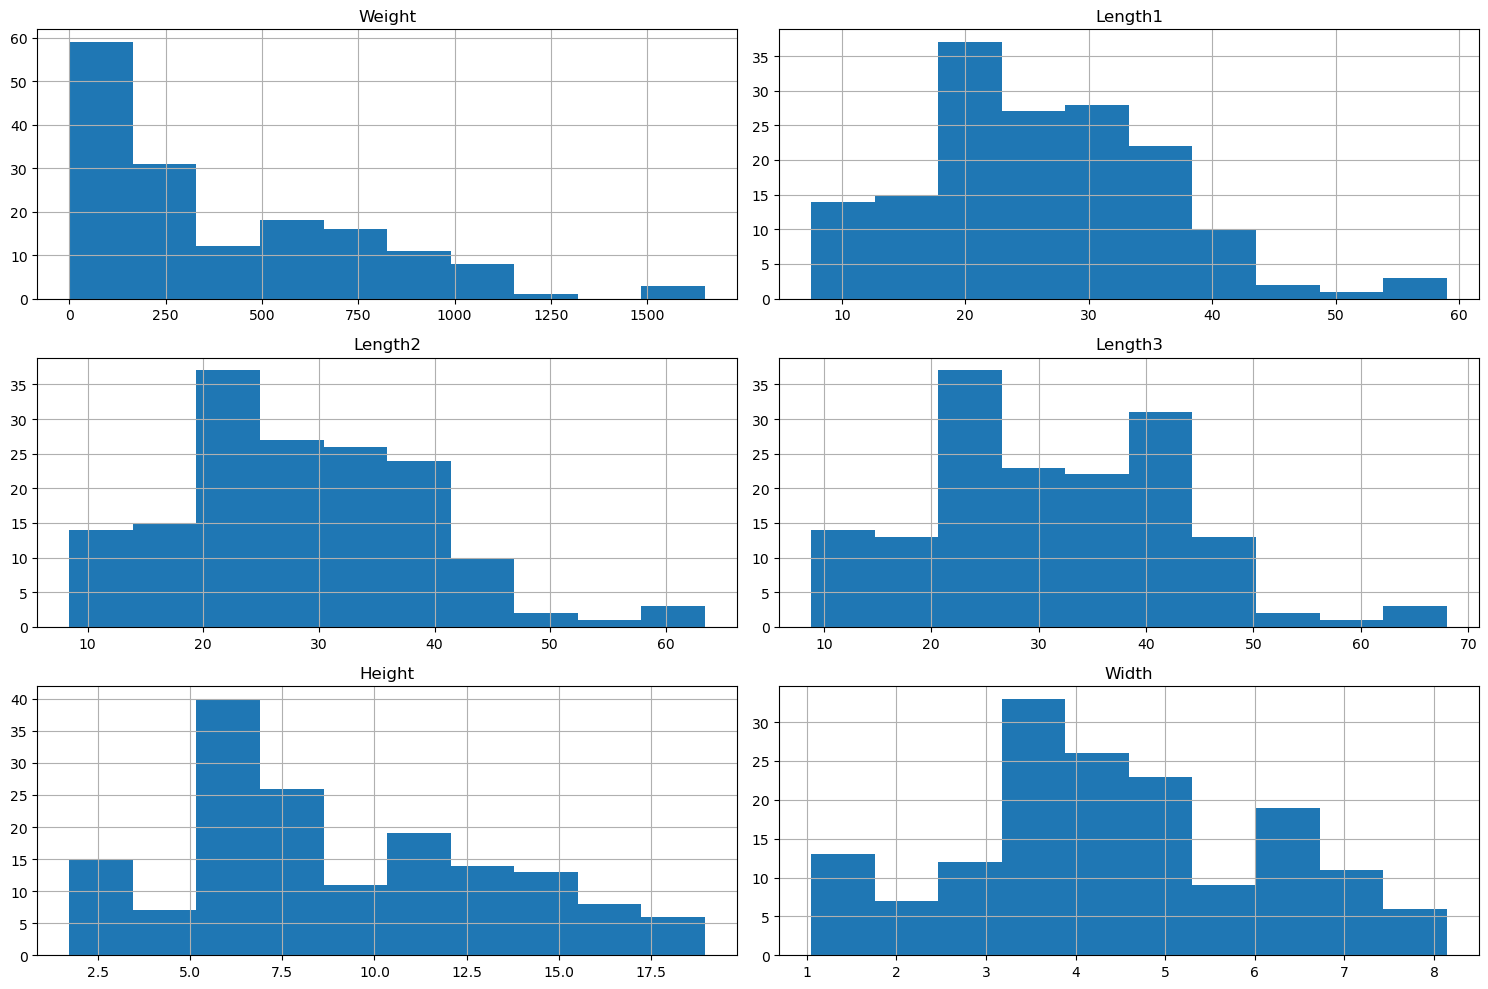

In [122]:
# Tüm sayısal değişkenlerin histogramlarını görelim
df.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

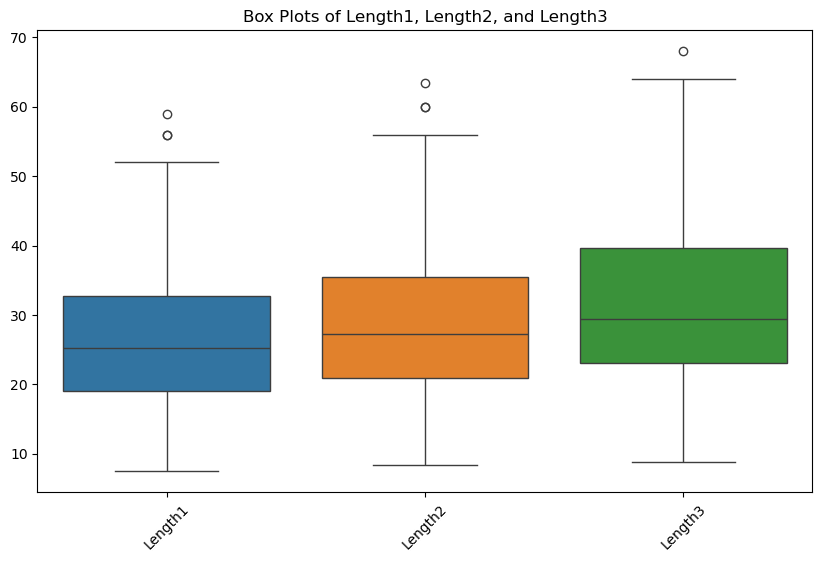

In [132]:
# Length1, Length2 ve Length3 değişkenlerinin kutu grafiklerini çizme
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Length1', 'Length2', 'Length3']])
plt.xticks(rotation=45)
plt.title('Box Plots of Length1, Length2, and Length3')
plt.show()

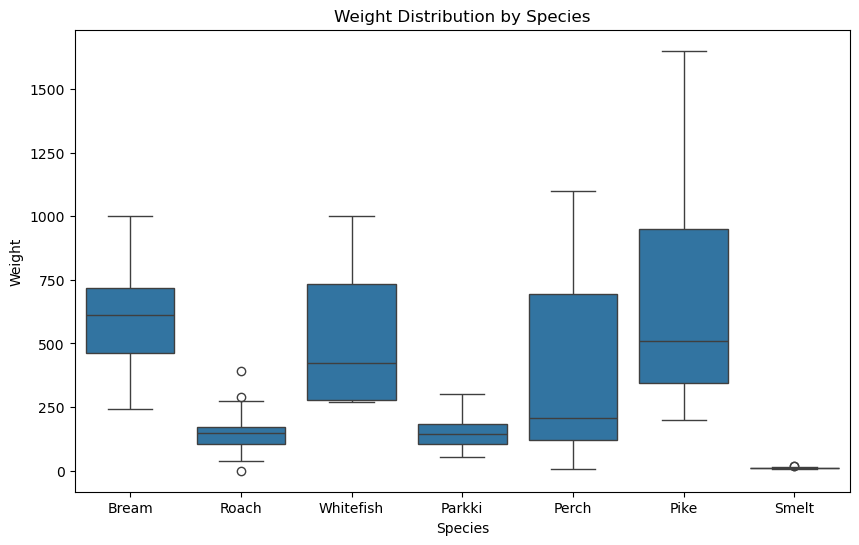

In [135]:
#Türe göre ağırlık
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Weight', data=df)
plt.title('Weight Distribution by Species')
plt.show()

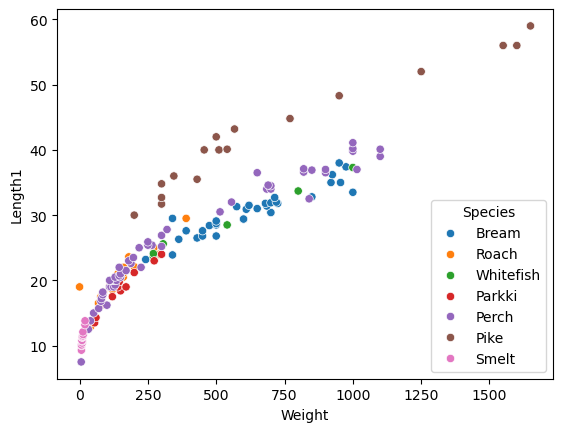

In [143]:
# Scatter plot
sns.scatterplot(data=df,x='Weight',y='Length1' ,hue='Species', markers=["o", "s", "D"])
plt.show()

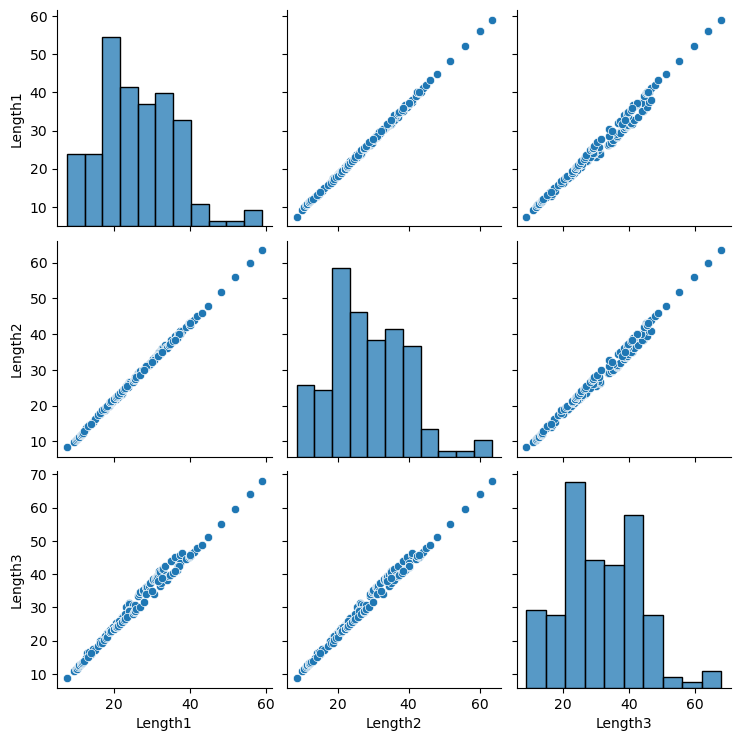

In [159]:
sns.pairplot(data=df[['Length1', 'Length2', 'Length3']],markers=["o", "s", "D"])
plt.show()

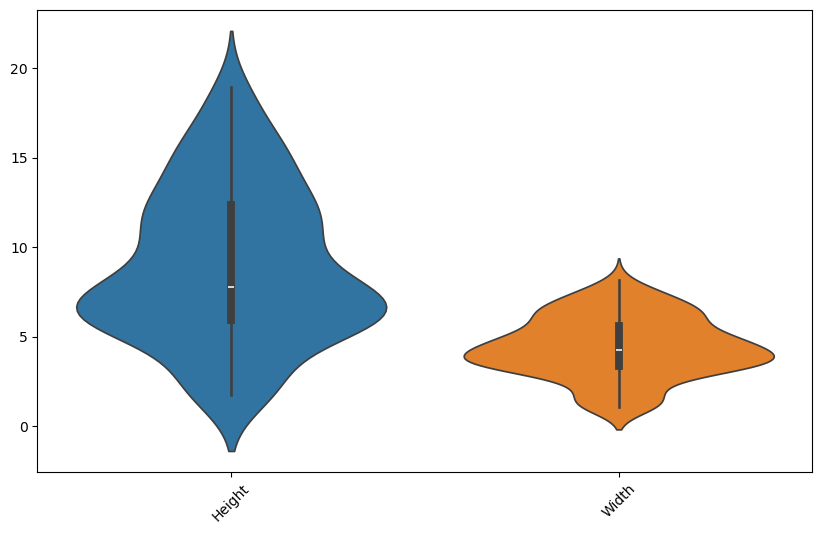

In [165]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Height','Width']])
plt.xticks(rotation=45)
plt.show()

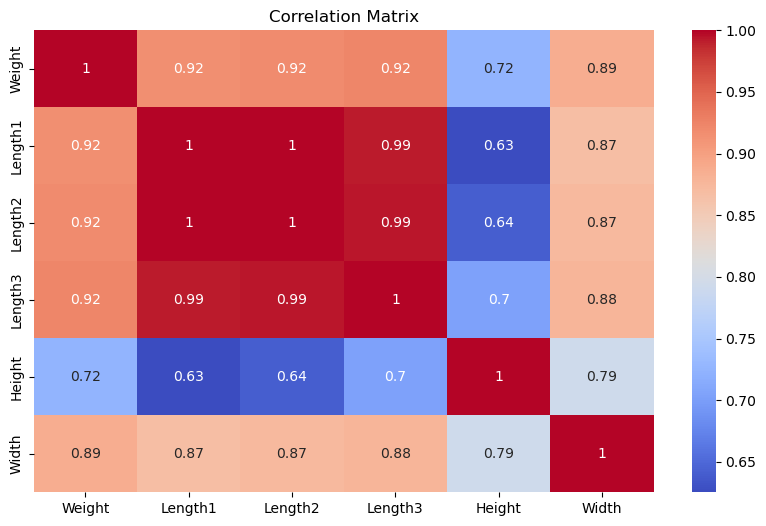

In [168]:
corr = df.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 0, 'Length3')

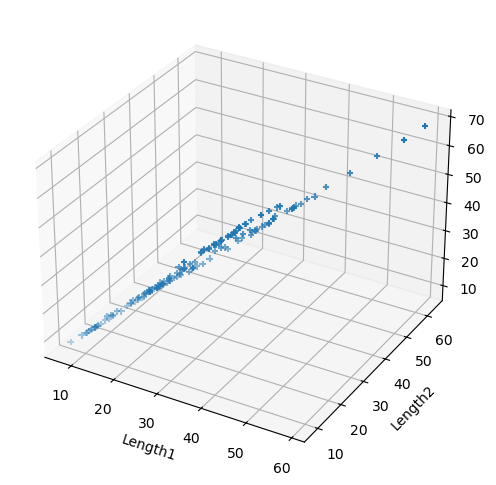

In [171]:
plt.figure(figsize=(15,6))
ax = plt.subplot(projection='3d')
ax.scatter3D(df['Length1'], df['Length2'], df['Length3'], 
marker='+')
ax.set_xlabel('Length1')
ax.set_ylabel('Length2')
ax.set_zlabel('Length3')

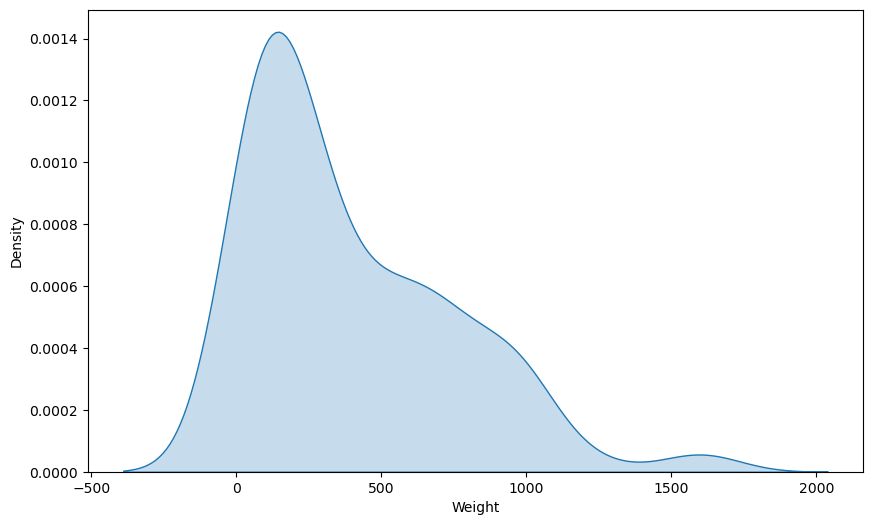

In [178]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df["Weight"],fill=True);